### AAI-530 Final Project: Delivery Drone Flight Predictions
<br>Group 6: Ahmed Salem, Matt Thompson, Darin Verduzco
<br>GitHub: https://github.com/caliskate/delivery-drone-flight-predictions
<br>Dataset source: https://doi.org/10.1184/R1/12683453.v1

### Dataset descriptions:
(196 flights total, 18 unique flight dates, 11.5 average number of flights per day)

| **Variable**            | **Description**                                                                                                                                 |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| **flight**              | An integer that represents the code of the flight performed. A flight is defined as the dataset recorded from take-off to landing on a predefined route. |
| **time**                | Seconds elapsed after flight start time.                                                                                                        |
| **wind_speed**          | Airspeed provided by the anemometer in meters per second (m/s).                                                                                |
| **wind_angle**          | Angle in degrees (deg) of the air flowing through the anemometer with respect to the north.                                                     |
| **battery_voltage**     | System voltage in Volts (V) measured immediately after the battery.                                                                             |
| **battery_current**     | System current in Ampere (A) measured immediately after the battery.                                                                           |
| **position_x**          | Longitude of the aircraft in degrees (deg).                                                                                                    |
| **position_y**          | Latitude of the aircraft in degrees (deg).                                                                                                     |
| **position_z**          | Altitude of the aircraft in meters (m) with respect to sea level.                                                                              |
| **orientation_x**       | Aircraft orientation in quaternions.                                                                                                           |
| **linear_acceleration_x**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_y**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **linear_acceleration_z**| Ground acceleration in meters per squared second (m/s²).                                                                                      |
| **speed**               | Programmed horizontal ground speed during cruise in meters per second (m/s).                                                                  |
| **altitude**            | Predefined altitude in meters (m). The aircraft takes off vertically until it reaches the preset altitude.                                      |
| **payload**             | Mass of the payload attached to the aircraft in grams (g). The payload used was confined in a standard USPS Small Flat Rate Box.                  |
| **date**                | Date of the flight.                                                                                                                            |
| **time_day**            | Local time when the flight started in the 24-hour format.                                                                                       |
| **route**               | Route type (see directly below):                                                                                                                |
|                         | - R1 to R7: Full flights completing a cruise movement.                                                                                          |
|                         | - A1: Ancillary ground test with no propellers and no motor movement.                                                                          |
|                         | - A2: Ancillary ground test with no propellers and minimum movement.                                                                           |
|                         | - A3: Ancillary ground test with propellers and minimum movement.                                                                              |
|                         | - H: Hover test with no horizontal movement.                                                                                                    |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder

### Import dataset from local dir

In [2]:
drone_raw_df =  pd.read_csv("flights.csv", low_memory = False)
drone_raw_df.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5


In [3]:
drone_raw_df.dtypes

flight                     int64
time                     float64
wind_speed               float64
wind_angle               float64
battery_voltage          float64
battery_current          float64
position_x               float64
position_y               float64
position_z               float64
orientation_x            float64
orientation_y            float64
orientation_z            float64
orientation_w            float64
velocity_x               float64
velocity_y               float64
velocity_z               float64
angular_x                float64
angular_y                float64
angular_z                float64
linear_acceleration_x    float64
linear_acceleration_y    float64
linear_acceleration_z    float64
speed                    float64
payload                  float64
altitude                  object
date                      object
time_day                  object
route                     object
dtype: object

# Data cleanup

In [4]:
# Make a copy of the dataframe to be edited
drone_df_edited = drone_raw_df.copy()

In [5]:
# Show unique altitude values
unique_altitude = drone_df_edited['altitude'].unique()
print(unique_altitude)

['25' '50' '75' '100' '0' '3' '25-50-100-25']


In [6]:
# Count altitudes with dash
altitude_with_dash_count = drone_df_edited['altitude'].str.contains('-').sum()
print(altitude_with_dash_count)

2185


In [7]:
# Drop (non-numeric) rows with dash in altitude, no documentation on this value explanation
drone_df_edited = drone_df_edited[~drone_df_edited['altitude'].str.contains('-')]
# Convert altitude to numeric
drone_df_edited.loc[:, 'altitude'] = pd.to_numeric(drone_df_edited['altitude'], errors='coerce')

In [8]:
unique_altitude = drone_df_edited['altitude'].unique()
print(unique_altitude)

[25 50 75 100 0 3]


In [9]:
# Convert route to categorical data
label_encoder = LabelEncoder()
drone_df_edited['route'] = label_encoder.fit_transform(drone_df_edited['route'])

In [10]:
# Combine time, time_day, and date columns into a datetime column and round the seconds
drone_df_edited['datetime'] = (
    pd.to_datetime(drone_df_edited['date'] + ' ' + drone_df_edited['time_day']) +
    pd.to_timedelta(drone_df_edited['time'], unit='s')
).dt.round('s')  # Round to the nearest second

In [11]:
pd.to_datetime(drone_df_edited['datetime'])

0        2019-04-07 10:13:00
1        2019-04-07 10:13:00
2        2019-04-07 10:13:00
3        2019-04-07 10:13:00
4        2019-04-07 10:13:01
                 ...        
255706   2019-10-24 09:47:14
255707   2019-10-24 09:47:14
255708   2019-10-24 09:47:14
255709   2019-10-24 09:47:15
255710   2019-10-24 09:47:15
Name: datetime, Length: 255711, dtype: datetime64[ns]

# Data evaluation

In [12]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
0,1,0.0,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
1,1,0.2,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
2,1,0.3,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
3,1,0.5,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
4,1,0.6,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:01


In [13]:
# Edited dataset summary
desc = drone_df_edited.describe()

# Force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,route,datetime
count,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,...,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711.0000,255711
mean,161.4543,97.8696,4.3336,169.2189,22.4382,17.9392,-77.7566,39.4301,295.7696,-0.0102,...,-0.0012,0.0001,0.0287,-0.3170,0.0165,-9.7958,7.3023,240.6555,4.1913,2019-07-06 06:10:41.085811456
min,1.0000,0.0000,0.0000,0.0000,18.8108,-0.3260,-79.9465,0.0000,0.0000,-0.5464,...,-2.2796,-3.6749,-1.8575,-5.8895,-9.1080,-22.6879,0.0000,0.0000,0.0000,2019-04-07 10:13:00
25%,112.0000,46.2100,1.5000,79.0000,21.5177,7.6417,-79.7828,40.4589,271.2835,-0.0241,...,-0.0433,-0.0384,-0.0407,-0.6916,-0.2032,-9.8959,4.0000,0.0000,4.0000,2019-06-24 11:16:00
50%,165.0000,93.1000,3.3000,177.0000,22.3115,21.9310,-79.7827,40.4590,292.1257,-0.0019,...,-0.0003,0.0001,0.0011,-0.0524,0.0100,-9.8011,8.0000,250.0000,4.0000,2019-07-03 16:58:48
75%,222.0000,141.5000,6.5000,244.0000,23.1642,25.2628,-79.7823,40.4591,325.2835,0.0103,...,0.0412,0.0407,0.0514,0.1796,0.2267,-9.6618,10.0000,500.0000,4.0000,2019-07-18 14:27:09
max,277.0000,428.2900,18.1000,359.0000,25.8949,47.1938,0.0000,40.4597,376.1887,0.4150,...,3.0228,2.8337,2.1724,4.6478,7.1399,-3.8305,12.0000,750.0000,9.0000,2019-10-24 09:47:15
std,70.9368,62.7548,3.4912,101.3437,1.2003,10.8540,12.5587,6.3685,58.4780,0.0475,...,0.1165,0.1753,0.2510,0.7706,0.4617,0.4617,3.2132,211.0019,1.2006,NaN


In [14]:
# Verify edited datatypes
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


In [15]:
drone_df_edited.date[0]

'2019-04-07'

In [16]:
drone_df_edited.time_day[0]

'10:13'

In [17]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [18]:
print(drone_df_edited['date'].nunique())  # Number of unique dates

18


In [19]:
print(drone_df_edited['date'].value_counts())

date
2019-08-05    27819
2019-07-15    25772
2019-07-24    20981
2019-07-03    19682
2019-06-19    19067
2019-06-11    16904
2019-07-10    16099
2019-06-25    15349
2019-06-24    15153
2019-07-09    14431
2019-05-06    10601
2019-07-18    10295
2019-06-29    10159
2019-07-01     9807
2019-09-19     9378
2019-04-07     8299
2019-06-05     3088
2019-10-24     2827
Name: count, dtype: int64


In [20]:
print(drone_df_edited['datetime'].isna().sum()) 

0


In [21]:
drone_df_edited = drone_df_edited.sort_values('date')

In [22]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
5541,5,7.70,2.3,124.0,19.940159,25.938686,-79.782606,40.458366,275.837475,0.012206,...,0.347420,0.065233,-9.466506,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:08
5540,5,7.60,2.2,121.0,20.021544,25.493387,-79.782606,40.458366,275.591660,0.015053,...,0.227869,0.146630,-9.217792,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:08
5539,5,7.40,2.2,109.0,20.236897,22.893158,-79.782606,40.458367,275.213168,0.019310,...,0.309298,0.037086,-9.345713,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:07
5538,5,7.31,2.1,84.0,20.164276,23.672430,-79.782606,40.458367,274.941246,0.020361,...,0.352521,-0.006074,-9.585793,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:07


In [23]:
drone_df_edited['datetime'].head()

0      2019-04-07 10:13:00
5541   2019-04-07 11:05:08
5540   2019-04-07 11:05:08
5539   2019-04-07 11:05:07
5538   2019-04-07 11:05:07
Name: datetime, dtype: datetime64[ns]

In [24]:
drone_df_edited['date'].head()

0       2019-04-07
5541    2019-04-07
5540    2019-04-07
5539    2019-04-07
5538    2019-04-07
Name: date, dtype: object

In [25]:
prediction1_columns = [
    'battery_current',
    'battery_voltage',
    'payload',
    'altitude',
    'speed',
    'wind_speed',
    'wind_angle'
]

In [26]:
# Debug
print("duplicate dates",drone_df_edited['date'].duplicated().sum())
print("NaN datetime values",drone_df_edited['datetime'].isna().sum()) 
print("NaN date values",drone_df_edited['datetime'].isna().sum()) 
print("total rows",len(drone_df_edited))  # Total rows
print("Unique datetime entries:", drone_df_edited['datetime'].nunique())
print("Unique date entries:", drone_df_edited['date'].nunique())
print("Total rows:", len(drone_df_edited))  # Total number of rows
# print("column types:",drone_df_edited.info())  # Check column data types
print("values per date:\n",drone_df_edited.groupby('date').size())

duplicate dates 255693
NaN datetime values 0
NaN date values 0
total rows 255711
Unique datetime entries: 38576
Unique date entries: 18
Total rows: 255711
values per date:
 date
2019-04-07     8299
2019-05-06    10601
2019-06-05     3088
2019-06-11    16904
2019-06-19    19067
2019-06-24    15153
2019-06-25    15349
2019-06-29    10159
2019-07-01     9807
2019-07-03    19682
2019-07-09    14431
2019-07-10    16099
2019-07-15    25772
2019-07-18    10295
2019-07-24    20981
2019-08-05    27819
2019-09-19     9378
2019-10-24     2827
dtype: int64


# Before date conversion (project data)

In [27]:
type(drone_df_edited['date'])

pandas.core.series.Series

In [28]:
drone_df_edited.date[0]

'2019-04-07'

In [29]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [30]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

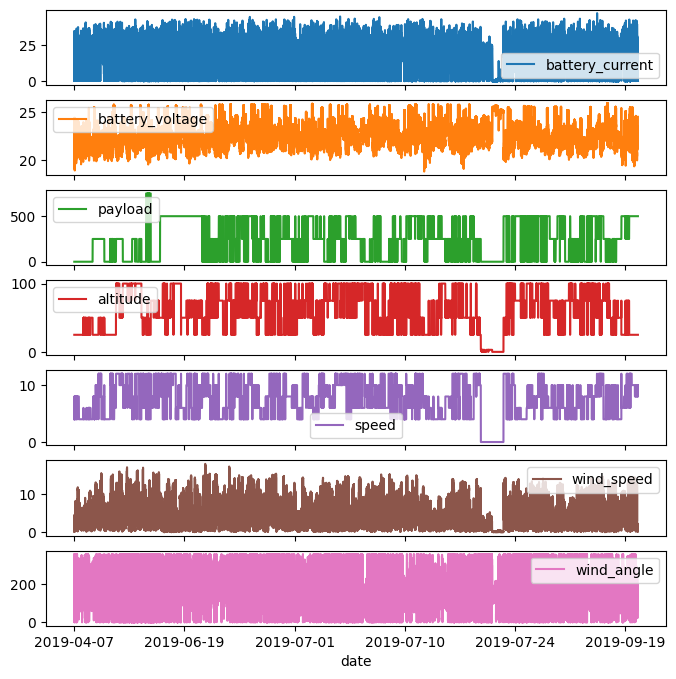

In [31]:
# Plot the data with 'date' on the x-axis
drone_df_edited.plot('date', prediction1_columns, subplots=True, figsize=(8, 8))

In [32]:
# 1st Suggestion per Roozbeh to convert date
# drone_df_edited['date'] = drone_df_edited['datetime'].dt.floor('D')

In [33]:
# Original date conversion as per M2 assignment instructions
# drone_df_edited['date'] = drone_df_edited['datetime'].dt.date

# Date Conversion

In [34]:
# 2nd suggestion per Roozbeh to convert date
drone_df_edited['date'] = pd.to_datetime(drone_df_edited['date'])

# After date conversion (project data)

In [35]:
type(drone_df_edited['date'])

pandas.core.series.Series

In [36]:
drone_df_edited.date[0]

Timestamp('2019-04-07 00:00:00')

In [37]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [38]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


In [39]:
# # Aggregate columns for each date
# drone_df_edited = drone_df_edited.groupby('date', as_index=False)[prediction1_columns].mean()

In [40]:
drone_df_edited.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,datetime
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,8,2019-04-07 10:13:00
5541,5,7.70,2.3,124.0,19.940159,25.938686,-79.782606,40.458366,275.837475,0.012206,...,0.347420,0.065233,-9.466506,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:08
5540,5,7.60,2.2,121.0,20.021544,25.493387,-79.782606,40.458366,275.591660,0.015053,...,0.227869,0.146630,-9.217792,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:08
5539,5,7.40,2.2,109.0,20.236897,22.893158,-79.782606,40.458367,275.213168,0.019310,...,0.309298,0.037086,-9.345713,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:07
5538,5,7.31,2.1,84.0,20.164276,23.672430,-79.782606,40.458367,274.941246,0.020361,...,0.352521,-0.006074,-9.585793,4.0,0.0,25,2019-04-07,11:05,5,2019-04-07 11:05:07


In [41]:
drone_df_edited.date[0]

Timestamp('2019-04-07 00:00:00')

In [42]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [43]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


In [44]:
# Debug
print("duplicate dates",drone_df_edited['date'].duplicated().sum())
print("NaN datetime values",drone_df_edited['datetime'].isna().sum()) 
print("NaN date values",drone_df_edited['datetime'].isna().sum()) 
print("total rows",len(drone_df_edited))  # Total rows
print("Unique datetime entries:", drone_df_edited['datetime'].nunique())
print("Unique date entries:", drone_df_edited['date'].nunique())
print("Total rows:", len(drone_df_edited))  # Total number of rows
# print("column types:",drone_df_edited.info())  # Check column data types
print("values per date:\n",drone_df_edited.groupby('date').size())

duplicate dates 255693
NaN datetime values 0
NaN date values 0
total rows 255711
Unique datetime entries: 38576
Unique date entries: 18
Total rows: 255711
values per date:
 date
2019-04-07     8299
2019-05-06    10601
2019-06-05     3088
2019-06-11    16904
2019-06-19    19067
2019-06-24    15153
2019-06-25    15349
2019-06-29    10159
2019-07-01     9807
2019-07-03    19682
2019-07-09    14431
2019-07-10    16099
2019-07-15    25772
2019-07-18    10295
2019-07-24    20981
2019-08-05    27819
2019-09-19     9378
2019-10-24     2827
dtype: int64


In [45]:
drone_df_edited.datetime[0]

Timestamp('2019-04-07 10:13:00')

In [46]:
drone_df_edited.date[0]

Timestamp('2019-04-07 00:00:00')

In [47]:
drone_df_edited.dtypes

flight                            int64
time                            float64
wind_speed                      float64
wind_angle                      float64
battery_voltage                 float64
battery_current                 float64
position_x                      float64
position_y                      float64
position_z                      float64
orientation_x                   float64
orientation_y                   float64
orientation_z                   float64
orientation_w                   float64
velocity_x                      float64
velocity_y                      float64
velocity_z                      float64
angular_x                       float64
angular_y                       float64
angular_z                       float64
linear_acceleration_x           float64
linear_acceleration_y           float64
linear_acceleration_z           float64
speed                           float64
payload                         float64
altitude                         object


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

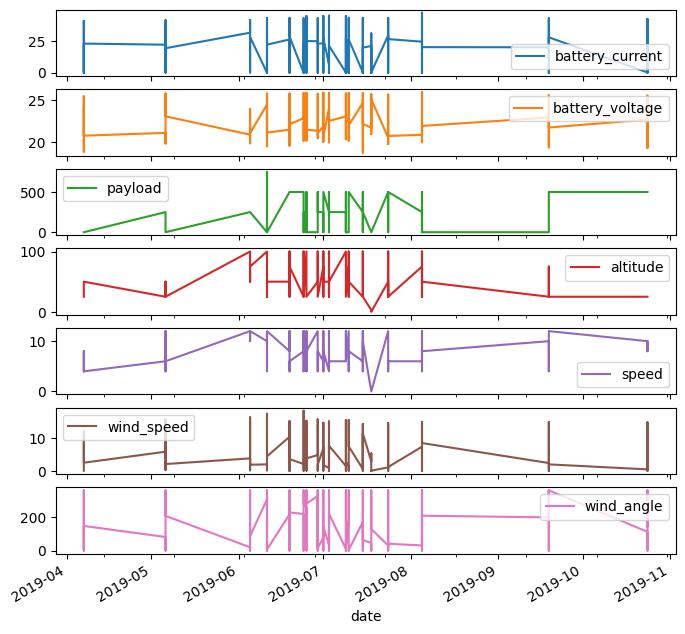

In [48]:
# Plot the data with 'date' on the x-axis - using pandas
drone_df_edited.plot('date', prediction1_columns, subplots=True, figsize=(8, 8))

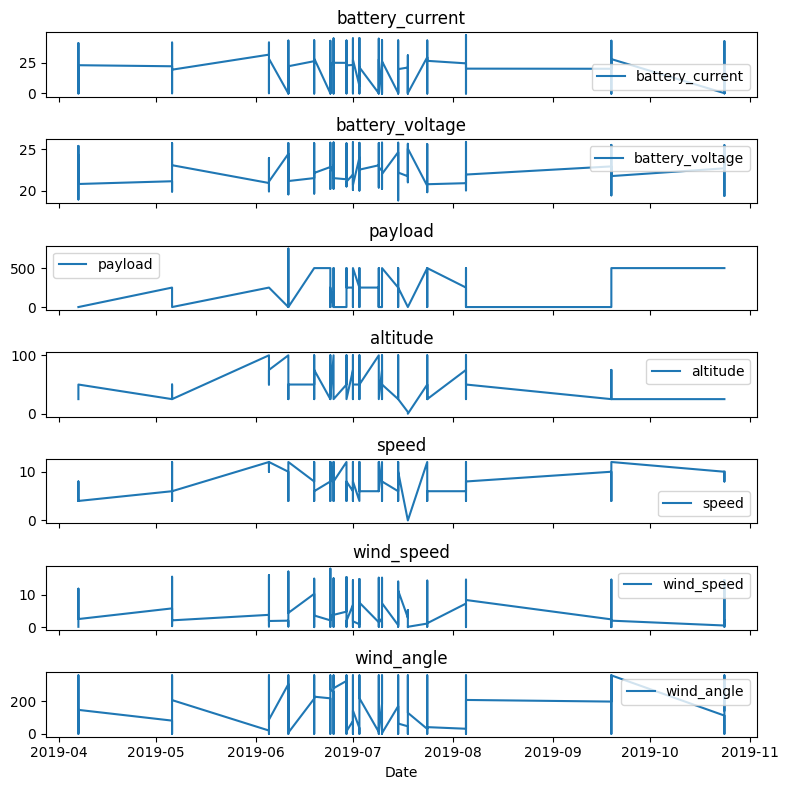

In [49]:
# Create a line plot with 'date' on the x-axis using matplotlib
fig, axes = plt.subplots(len(prediction1_columns), 1, figsize=(8, 8), sharex=True)

for i, column in enumerate(prediction1_columns):
    axes[i].plot(drone_df_edited['date'], drone_df_edited[column], label=column)
    axes[i].set_title(column)
    axes[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()